In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /gdrive/My Drive/test

[Errno 2] No such file or directory: '/gdrive/My Drive/test'
/content


In [6]:
df_vib = pd.read_excel('Vibration.xlsx')
df_vib.columns = ['first','A2V9005A','A2V9004A','A2V9007A','A2V9006A','A2V9015A','A2V9014A','A2V9017A','A2V9016A','A2V9021A','A2V9019A','A2V9018A']
df_vib1=df_vib.drop(['first'], axis=1)
df_vib1.head()

,A2V9005A,A2V9004A,A2V9007A,A2V9006A,A2V9015A,A2V9014A,A2V9017A,A2V9016A,A2V9021A,A2V9019A,A2V9018A
0,1.8,1.9,0.9,1.2,1.0,0.8,3.3,3.1,5013.3,8.4,8.9
1,1.8,1.9,0.9,1.2,1.0,0.8,3.3,3.1,5014.1,8.3,8.9
2,1.8,1.9,0.9,1.2,1.0,0.8,3.3,3.2,5014.5,8.3,8.9
3,1.8,1.9,0.9,1.2,1.0,0.8,3.3,3.2,5014.9,8.3,8.9
4,1.8,1.9,0.9,1.2,1.0,0.8,3.3,3.2,5015.4,8.3,8.9


In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#df_vib=pd.read_excel('Vibration.xlsx')

In [7]:
df_vib1_des=df_vib1.describe()

df_b=df_vib1_des.round(2).T
#df_b.insert(0, "Count1", ['308221','308221','308221','308221','308221','308221','308221','308221','308221','308221','308221'], True)
df_b1=df_b.T
df_b
cols = ['count']
df_b[cols] = df_b[cols].applymap(np.int64)
df_b

<ipython-input-7-27f58e315ae9>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_b[cols] = df_b[cols].applymap(np.int64)


,count,mean,std,min,25%,50%,75%,max
A2V9005A,308221,1.74,0.05,1.7,1.7,1.7,1.8,1.8
A2V9004A,308221,1.84,0.05,1.8,1.8,1.8,1.9,1.9
A2V9007A,308221,0.89,0.06,0.8,0.9,0.9,0.9,1.0
A2V9006A,308221,1.08,0.08,0.9,1.0,1.1,1.1,1.3
A2V9015A,308221,1.01,0.03,1.0,1.0,1.0,1.0,1.1
A2V9014A,308221,0.83,0.08,0.7,0.8,0.8,0.9,0.9
A2V9017A,308221,3.29,0.07,3.1,3.2,3.3,3.3,3.4
A2V9016A,308221,3.13,0.05,3.1,3.1,3.1,3.2,3.2
A2V9021A,308221,4960.33,41.34,4835.0,4917.0,4966.3,5001.3,5030.6
A2V9019A,308221,8.30,0.24,7.7,8.1,8.3,8.5,8.8


In [8]:
df_vib1.head()
print(len(df_vib1.A2V9005A.unique()),len(df_vib1.A2V9004A.unique()), len(df_vib1.A2V9007A.unique()), len(df_vib1.A2V9006A.unique()), len(df_vib1.A2V9015A.unique()), len(df_vib1.A2V9014A.unique()),
len(df_vib1.A2V9017A.unique()), len(df_vib1.A2V9016A.unique()), len(df_vib1.A2V9021A.unique()), len(df_vib1.A2V9019A.unique()) , len(df_vib1.A2V9018A.unique()) )

2 2 3 5 2 3 4 2 1779 12 14


<ipython-input-9-f5ebade2f0e2>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_vib1[['A2V9021A','A2V9019A','A2V9018A']].hist(ax = ax)


array([[<Axes: title={'center': 'A2V9021A'}>,
        <Axes: title={'center': 'A2V9019A'}>],
       [<Axes: title={'center': 'A2V9018A'}>, <Axes: >]], dtype=object)

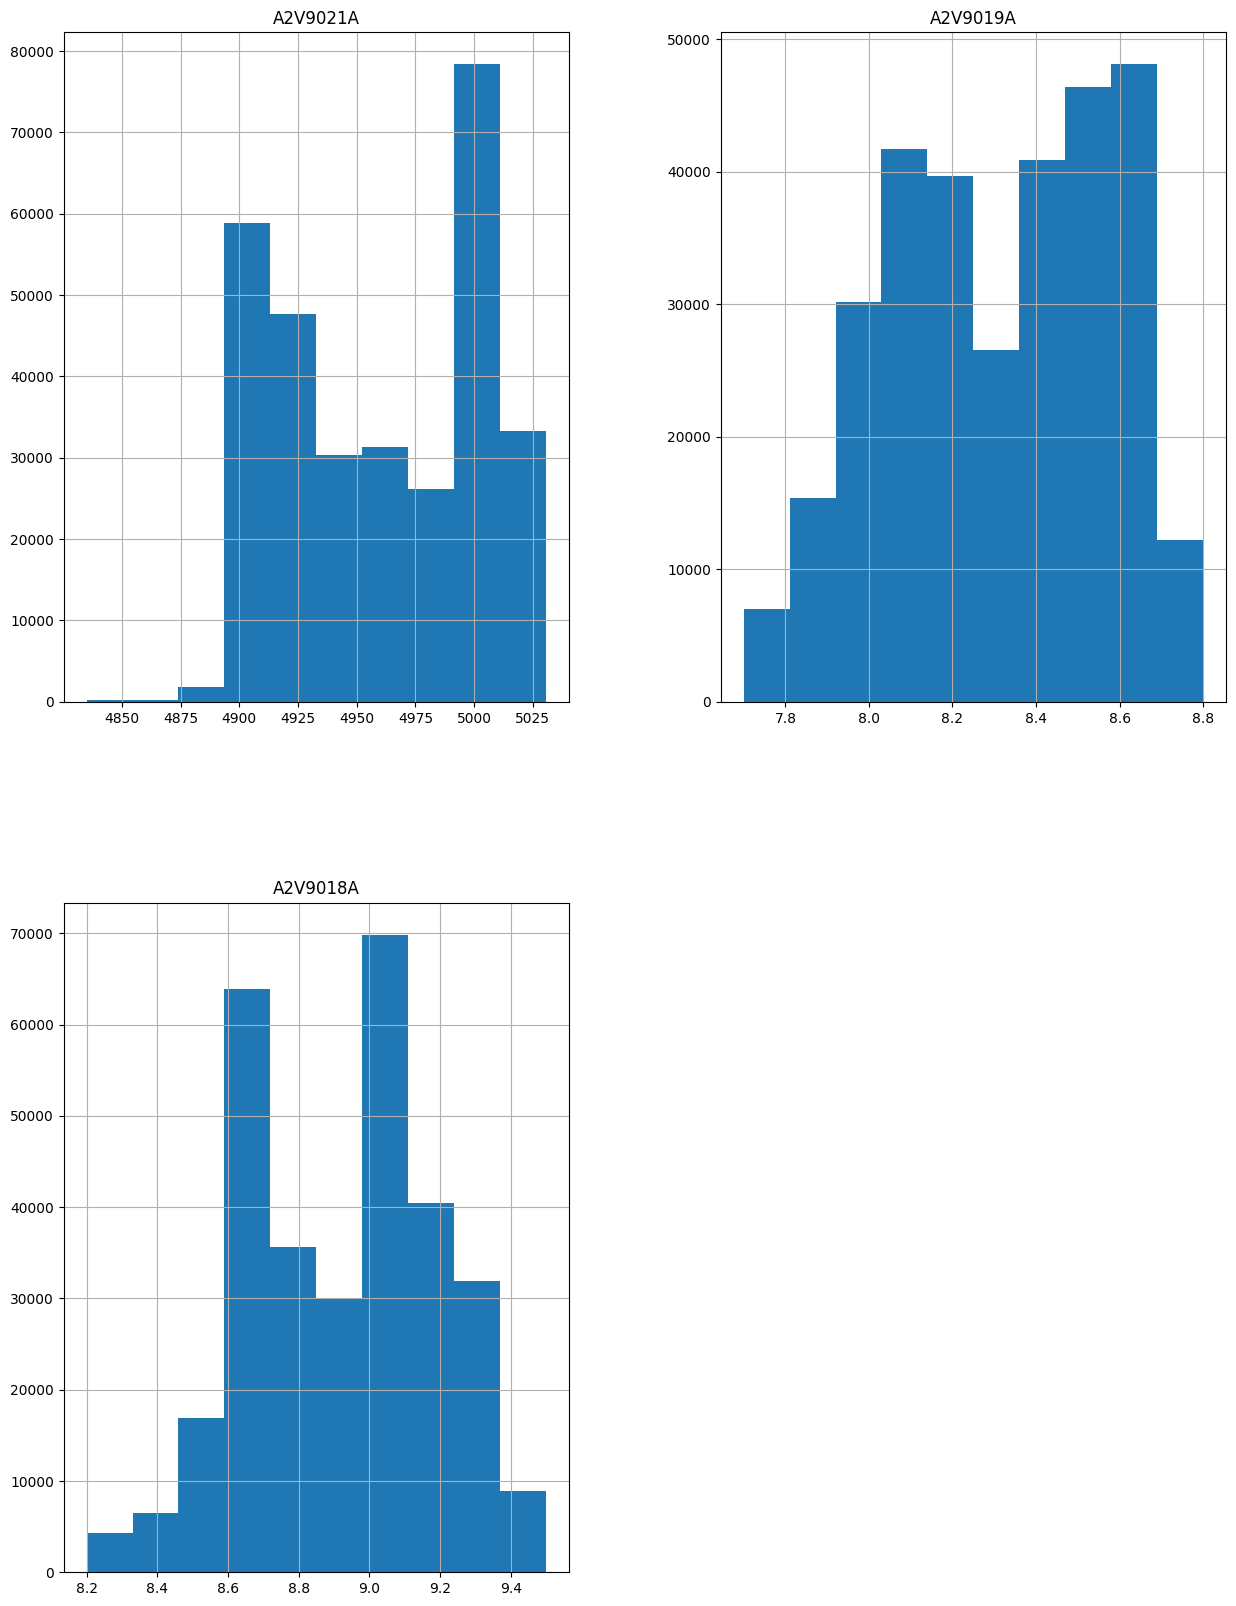

In [9]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_vib1[['A2V9021A','A2V9019A','A2V9018A']].hist(ax = ax)

<ipython-input-10-88a512e69456>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


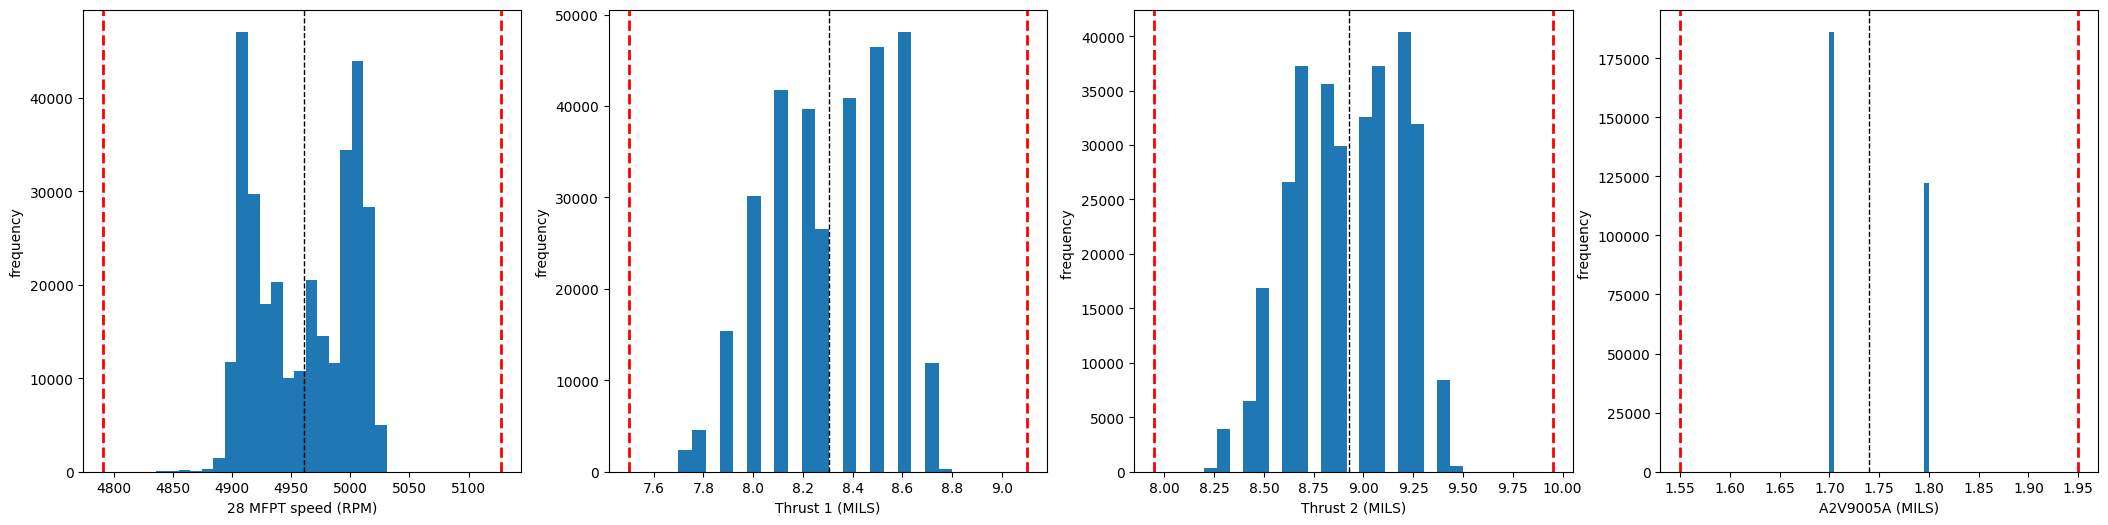

In [10]:
# learn more about subplots.

plt.subplots(figsize=(26, 6))
plt.subplot(1,4,1)
plt.hist(df_vib1['A2V9021A'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('28 MFPT speed (RPM)')
plt.axvline(df_vib1['A2V9021A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_vib1['A2V9021A'], [25])-1.5*(np.percentile(df_vib1['A2V9021A'], [75])-np.percentile(df_vib1['A2V9021A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_vib1['A2V9021A'], [75])+1.5*(np.percentile(df_vib1['A2V9021A'], [75])-np.percentile(df_vib1['A2V9021A'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(1,4,2)
plt.hist(df_vib1['A2V9019A'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('Thrust 1 (MILS)')
plt.axvline(df_vib1['A2V9019A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_vib1['A2V9019A'], [25])-1.5*(np.percentile(df_vib1['A2V9019A'], [75])-np.percentile(df_vib1['A2V9019A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_vib1['A2V9019A'], [75])+1.5*(np.percentile(df_vib1['A2V9019A'], [75])-np.percentile(df_vib1['A2V9019A'], [25])), color='red', linestyle='dashed', linewidth=2)


plt.subplot(1,4,3)
plt.hist(df_vib1['A2V9018A'], density=False, bins=20)
plt.ylabel('frequency ')
plt.xlabel('Thrust 2 (MILS)')
plt.axvline(df_vib1['A2V9018A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_vib1['A2V9018A'], [25])-1.5*(np.percentile(df_vib1['A2V9018A'], [75])-np.percentile(df_vib1['A2V9018A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_vib1['A2V9018A'], [75])+1.5*(np.percentile(df_vib1['A2V9018A'], [75])-np.percentile(df_vib1['A2V9018A'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(1,4,4)
plt.hist(df_vib1['A2V9005A'], density=False, bins=20)
plt.ylabel('frequency ')
plt.xlabel('A2V9005A (MILS)')
plt.axvline(df_vib1['A2V9005A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_vib1['A2V9005A'], [25])-1.5*(np.percentile(df_vib1['A2V9005A'], [75])-np.percentile(df_vib1['A2V9005A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_vib1['A2V9005A'], [75])+1.5*(np.percentile(df_vib1['A2V9005A'], [75])-np.percentile(df_vib1['A2V9005A'], [25])), color='red', linestyle='dashed', linewidth=2)


In [ ]:
#df_vib1.plot.line(figsize=(8,8))

In [ ]:
#df_vib2.plot.line(figsize=(8,8), xlabel='minutes', ylabel='speed')

In [ ]:
#df_vib1['A2V9021A'].head(300).plot.line(figsize=(8,8), xlabel='minutes', ylabel='speed')

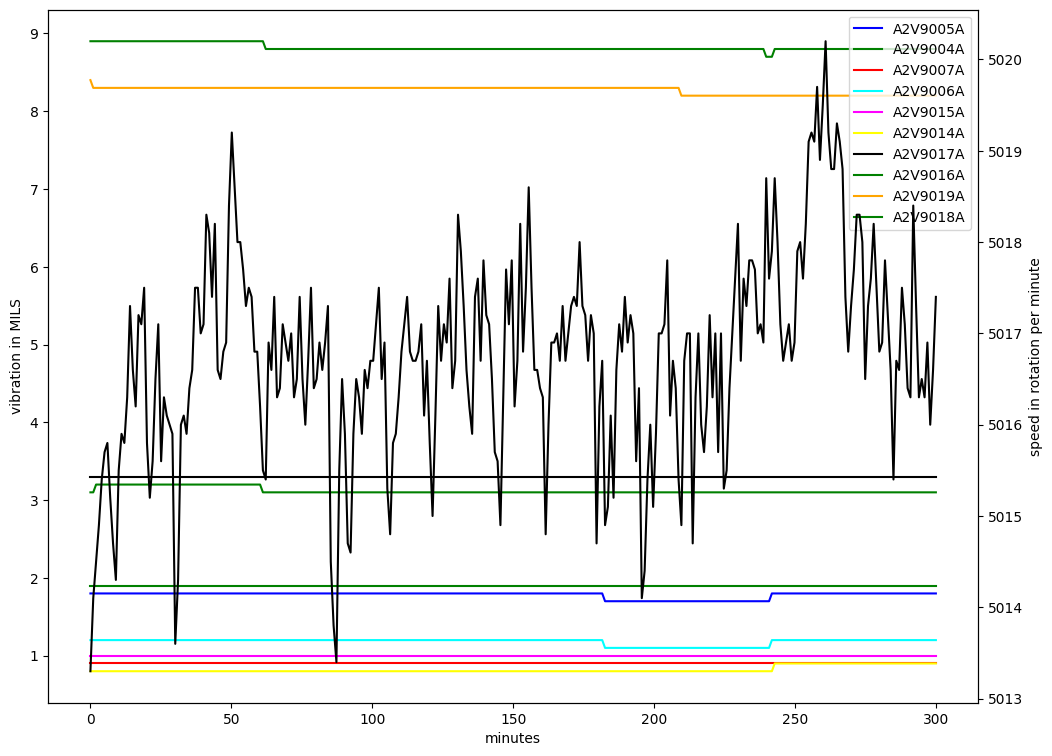

In [11]:
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#lebel in each plt.plot is for legends
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 300,300)
plt.xlabel('minutes')
plt.ylabel('vibration in MILS')      # specify color by name
plt.plot(x, df_vib1['A2V9005A'].head(300),label="A2V9005A", color='blue' )
plt.plot(x, df_vib1['A2V9004A'].head(300),label="A2V9004A", color='green')           # short color code (rgbcmyk)
plt.plot(x, df_vib1['A2V9007A'].head(300),label="A2V9007A", color='red')           # short color code (rgbcmyk)
plt.plot(x, df_vib1['A2V9006A'].head(300),label="A2V9006A", color='cyan')           # short color code (rgbcmyk)
plt.plot(x, df_vib1['A2V9015A'].head(300),label="A2V9015A", color='magenta')           # short color code (rgbcmyk)
plt.plot(x, df_vib1['A2V9014A'].head(300),label="A2V9014A", color='yellow')           # short color code (rgbcmyk)
plt.plot(x, df_vib1['A2V9017A'].head(300),label="A2V9017A", color='black')           # short color code (rgbcmyk)
plt.plot(x, df_vib1['A2V9016A'].head(300),label="A2V9016A", color='g')           # short color code (rgbcmyk)
plt.plot(x, df_vib1['A2V9019A'].head(300),label="A2V9019A", color='orange')           # short color code (rgbcmyk)
plt.plot(x, df_vib1['A2V9018A'].head(300),label="A2V9018A", color='g')           # short color code (rgbcmyk)

# twin object for two different y-axis on the sample plot

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x, df_vib1['A2V9021A'].head(300),color="black")
ax2.set_ylabel('speed in rotation per minute')
ax.legend(loc='upper right')
plt.show()



In [14]:
# below to upload from local files
#from google.colab import files
#uploaded = files.upload()
# below to upload from google dive
#df_temp=pd.read_excel('temp.xlsx')
df_temp = pd.read_excel('temp.xlsx')

In [15]:
#df_temp.columns=['timetag','2T4048A','A2T4047A','A2T4046A','A2T4143A','A2T4141A' 'A2T2573A','A2T4145A','A2T2574A','A2T4137A','2T4139A']
# 2T4139A column values are all 0. This means at this point temperature was recorded wrong or something.
df_temp.columns=['TimeTag', '2T4048A',
       '2T4047A',
       '2T4046A',
       '2T4143A',
       '2T4141A',
       '2T2573A',
       '2T4145A',
       '2T2574A',
       '2T4137A',
       '2T4139A']

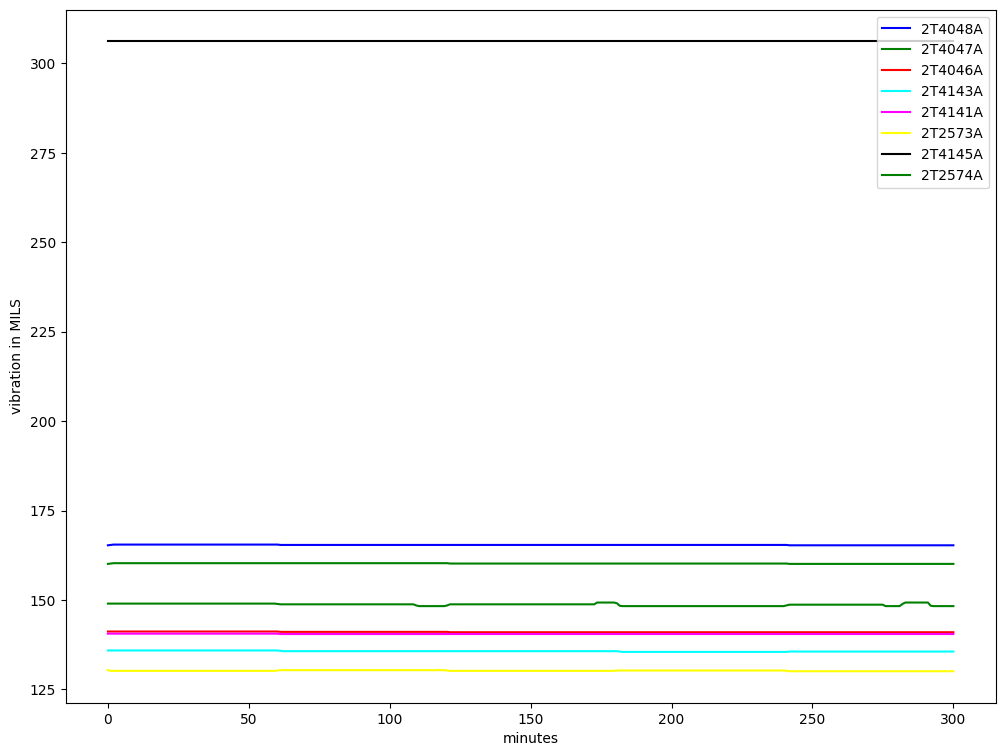

In [16]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 300,300)
plt.xlabel('minutes')
plt.ylabel('vibration in MILS')      # specify color by name
plt.plot(x, df_temp['2T4048A'].head(300), label='2T4048A' , color='blue')
plt.plot(x, df_temp['2T4047A'].head(300),label='2T4047A' , color='green')           # short color code (rgbcmyk)
plt.plot(x, df_temp['2T4046A'].head(300), label='2T4046A' ,color='red')           # short color code (rgbcmyk)
plt.plot(x, df_temp['2T4143A'].head(300),label='2T4143A' , color='cyan')           # short color code (rgbcmyk)
plt.plot(x, df_temp['2T4141A'].head(300), label='2T4141A' ,color='magenta')           # short color code (rgbcmyk)
plt.plot(x, df_temp['2T2573A'].head(300), label='2T2573A' ,color='yellow')           # short color code (rgbcmyk)
plt.plot(x, df_temp['2T4145A'].head(300),label='2T4145A' , color='black')           # short color code (rgbcmyk)
plt.plot(x, df_temp['2T2574A'].head(300),label='2T2574A' , color='g')           # short color code (rgbcmyk)ax.legend(loc='upper right')
ax.legend(loc='upper right')

plt.show()

In [17]:
df_temp.columns=['first','A2T4048A','A2T4047A','A2T4046A','A2T4143A','A2T4141A','A2T2573A','A2T4145A','A2T2574A','A2T4137A','anomaly']
df_temp1=df_temp.drop(['first','anomaly'], axis=1)
df_temp_des=df_temp1.describe()
df_temp_des.round(2)

,A2T4048A,A2T4047A,A2T4046A,A2T4143A,A2T4141A,A2T2573A,A2T4145A,A2T2574A,A2T4137A
count,308221.00,308221.00,308221.00,308221.00,308221.00,308221.00,308221.00,308221.00,308221.00
mean,164.78,159.64,139.21,133.92,138.47,128.41,303.90,146.81,138.32
std,3.04,3.68,5.68,5.81,5.53,5.56,5.72,4.07,5.53
min,157.80,151.20,126.50,120.30,126.00,115.10,293.40,138.10,125.80
25%,162.40,156.90,135.00,129.60,134.30,124.20,298.80,143.50,134.00
50%,165.70,160.80,141.50,136.20,140.90,130.60,306.20,148.70,140.70
75%,167.50,163.00,144.10,139.00,143.20,133.30,309.20,150.20,143.10
max,168.80,164.30,146.30,141.10,145.30,135.30,311.80,152.70,145.10


In [18]:
print(len(df_temp1.A2T4048A.unique()), len(df_temp1.A2T4047A.unique()), len(df_temp1.A2T4046A.unique()), len(df_temp1.A2T4143A.unique()),
      len(df_temp1.A2T4141A.unique()), len(df_temp1.A2T2573A.unique()), len(df_temp1.A2T4145A.unique()), len(df_temp1.A2T2574A.unique()),
      len(df_temp1.A2T4137A.unique()))

111 132 199 209 194 202 185 147 194


In [ ]:
#fig = plt.figure(figsize = (15,20))
#ax = fig.gca()
#df_temp1.hist(ax = ax)

<Axes: >

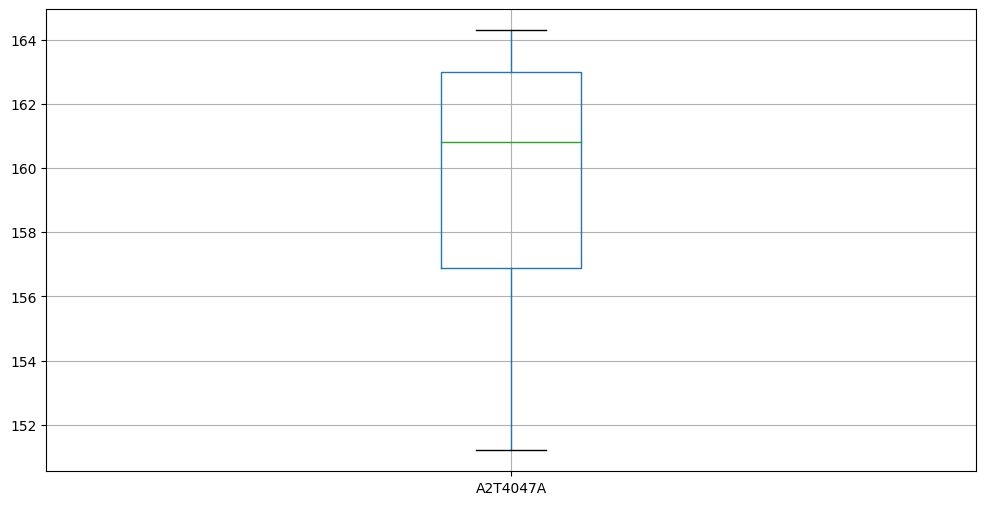

In [19]:
#import seaborn as sns
#sns.boxplot(x=df_temp1['A2T4145A'])
#a=np.percentile(df_temp1['A2T2573A'], [75])-np.percentile(df_temp1['A2T2573A'], [25])
#lower=np.percentile(df_temp1['A2T2573A'], [25])-1.5*(np.percentile(df_temp1['A2T2573A'], [75])-np.percentile(df_temp1['A2T2573A'], [25]))
#higher=np.percentile(df_temp1['A2T2573A'], [75])+1.5*a
#print(lower,higher)
#lower
df_temp1.boxplot(column=['A2T4047A'],figsize=(12,6))

<ipython-input-20-273b9d5fd5ed>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,1)


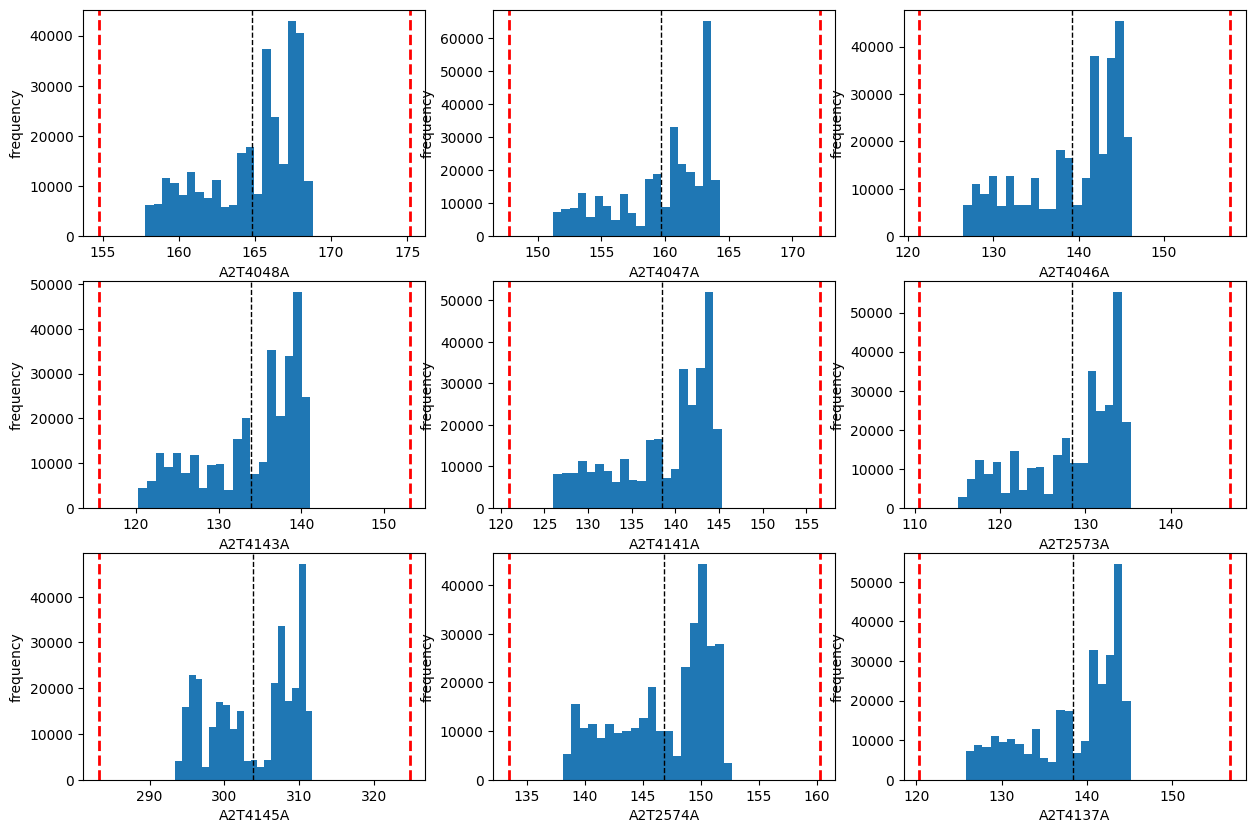

In [20]:
#A2T4048A','A2T4047A','A2T4046A','A2T4143A','A2T4141A','A2T2573A','A2T4145A','A2T2574A','A2T4137A'
plt.subplots(figsize=(15, 10))
plt.subplot(3,3,1)
plt.hist(df_temp1['A2T4048A'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('A2T4048A')
plt.axvline(df_temp1['A2T4048A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp1['A2T4048A'], [25])-1.5*(np.percentile(df_temp1['A2T4048A'], [75])-np.percentile(df_temp1['A2T4048A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp1['A2T4048A'], [75])+1.5*(np.percentile(df_temp1['A2T4048A'], [75])-np.percentile(df_temp1['A2T4048A'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(3,3,2)
plt.hist(df_temp1['A2T4047A'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('A2T4047A')
plt.axvline(df_temp1['A2T4047A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp1['A2T4047A'], [25])-1.5*(np.percentile(df_temp1['A2T4047A'], [75])-np.percentile(df_temp1['A2T4047A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp1['A2T4047A'], [75])+1.5*(np.percentile(df_temp1['A2T4047A'], [75])-np.percentile(df_temp1['A2T4047A'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(3,3,3)
plt.hist(df_temp1['A2T4046A'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('A2T4046A')
plt.axvline(df_temp1['A2T4046A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp1['A2T4046A'], [25])-1.5*(np.percentile(df_temp1['A2T4046A'], [75])-np.percentile(df_temp1['A2T4046A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp1['A2T4046A'], [75])+1.5*(np.percentile(df_temp1['A2T4046A'], [75])-np.percentile(df_temp1['A2T4046A'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(3,3,4)
plt.hist(df_temp1['A2T4143A'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('A2T4143A')
plt.axvline(df_temp1['A2T4143A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp1['A2T4143A'], [25])-1.5*(np.percentile(df_temp1['A2T4143A'], [75])-np.percentile(df_temp1['A2T4143A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp1['A2T4143A'], [75])+1.5*(np.percentile(df_temp1['A2T4143A'], [75])-np.percentile(df_temp1['A2T4143A'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(3,3,5)
plt.hist(df_temp1['A2T4141A'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('A2T4141A')
plt.axvline(df_temp1['A2T4141A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp1['A2T4141A'], [25])-1.5*(np.percentile(df_temp1['A2T4141A'], [75])-np.percentile(df_temp1['A2T4141A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp1['A2T4141A'], [75])+1.5*(np.percentile(df_temp1['A2T4141A'], [75])-np.percentile(df_temp1['A2T4141A'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(3,3,6)
plt.hist(df_temp1['A2T2573A'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('A2T2573A')
plt.axvline(df_temp1['A2T2573A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp1['A2T2573A'], [25])-1.5*(np.percentile(df_temp1['A2T2573A'], [75])-np.percentile(df_temp1['A2T2573A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp1['A2T2573A'], [75])+1.5*(np.percentile(df_temp1['A2T2573A'], [75])-np.percentile(df_temp1['A2T2573A'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(3,3,7)
plt.hist(df_temp1['A2T4145A'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('A2T4145A')
plt.axvline(df_temp1['A2T4145A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp1['A2T4145A'], [25])-1.5*(np.percentile(df_temp1['A2T4145A'], [75])-np.percentile(df_temp1['A2T4145A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp1['A2T4145A'], [75])+1.5*(np.percentile(df_temp1['A2T4145A'], [75])-np.percentile(df_temp1['A2T4145A'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(3,3,8)
plt.hist(df_temp1['A2T2574A'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('A2T2574A')
plt.axvline(df_temp1['A2T2574A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp1['A2T2574A'], [25])-1.5*(np.percentile(df_temp1['A2T2574A'], [75])-np.percentile(df_temp1['A2T2574A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp1['A2T2574A'], [75])+1.5*(np.percentile(df_temp1['A2T2574A'], [75])-np.percentile(df_temp1['A2T2574A'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(3,3,9)
plt.hist(df_temp1['A2T4137A'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('A2T4137A')
plt.axvline(df_temp1['A2T4137A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp1['A2T4137A'], [25])-1.5*(np.percentile(df_temp1['A2T4137A'], [75])-np.percentile(df_temp1['A2T4137A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp1['A2T4137A'], [75])+1.5*(np.percentile(df_temp1['A2T4137A'], [75])-np.percentile(df_temp1['A2T4137A'], [25])), color='red', linestyle='dashed', linewidth=2)

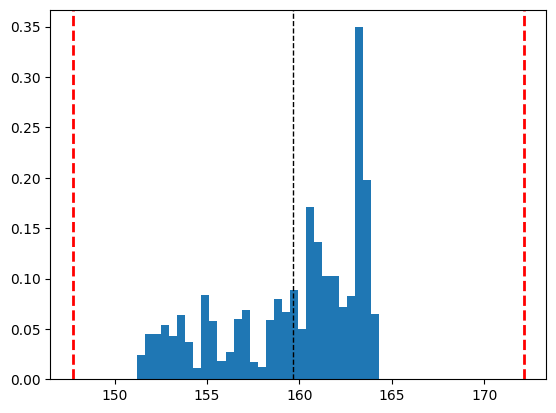

In [21]:
plt.hist(df_temp1['A2T4047A'], density=True, bins=30)  # density=False would make counts
plt.axvline(df_temp1['A2T4047A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp1['A2T4047A'], [25])-1.5*(np.percentile(df_temp1['A2T4047A'], [75])-np.percentile(df_temp1['A2T4047A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp1['A2T4047A'], [75])+1.5*(np.percentile(df_temp1['A2T4047A'], [75])-np.percentile(df_temp1['A2T4047A'], [25])), color='red', linestyle='dashed', linewidth=2)

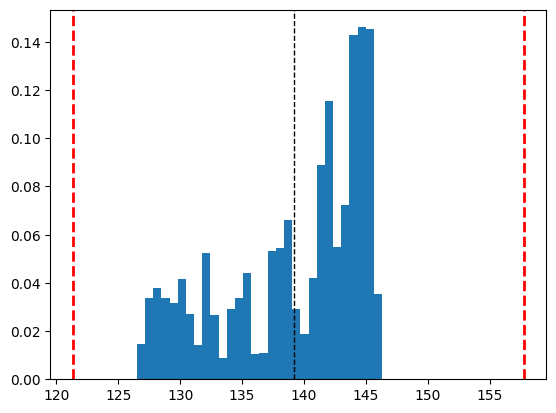

In [22]:
plt.hist(df_temp1['A2T4046A'], density=True, bins=30)  # density=False would make counts
plt.axvline(df_temp1['A2T4046A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp1['A2T4046A'], [25])-1.5*(np.percentile(df_temp1['A2T4046A'], [75])-np.percentile(df_temp1['A2T4046A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp1['A2T4046A'], [75])+1.5*(np.percentile(df_temp1['A2T4046A'], [75])-np.percentile(df_temp1['A2T4046A'], [25])), color='red', linestyle='dashed', linewidth=2)

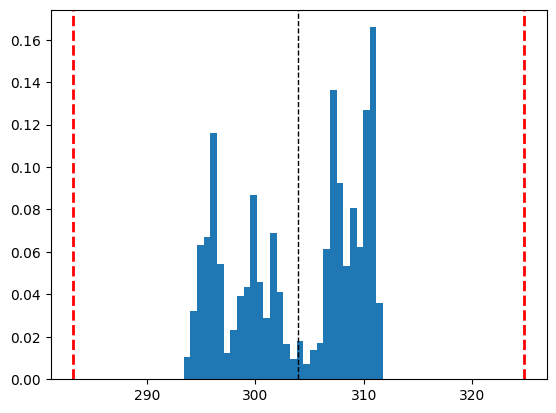

In [23]:
plt.hist(df_temp1['A2T4145A'], density=True, bins=30)  # density=False would make counts
plt.axvline(df_temp1['A2T4145A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp1['A2T4145A'], [25])-1.5*(np.percentile(df_temp1['A2T4145A'], [75])-np.percentile(df_temp1['A2T4145A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp1['A2T4145A'], [75])+1.5*(np.percentile(df_temp1['A2T4145A'], [75])-np.percentile(df_temp1['A2T4145A'], [25])), color='red', linestyle='dashed', linewidth=2)

In [ ]:
#df_temp1.head(300).plot.line(figsize=(16,8), xlabel='minutes', ylabel='temperature')

In [ ]:
#df_vib1.plot.line()

In [ ]:
cd /content/gdrive/My Drive

In [24]:
df_handfilled = pd.read_excel('handfilled1.xlsx')
df_handfilled1=df_handfilled.drop(['points and time','RPM'], axis=1)
df_handfilled.head(20)
df_handfilled.round({"overall":2, "Param1":2, "Param2":2, "Param3":2, "Param4":2, "Param5":2, "Param6":2})

,points and time,RPM,overall,Param1,Param2,Param3,Param4,Param5,Param6
0,2-PMP-3-84-2V 12-Nov-20 08:00,4918,0.12,0.02,0.11,0.02,0.02,0.00,0.02
1,2-PMP-3-84-2H 12-Nov-20 08:00,4918,0.23,0.05,0.22,0.02,0.03,0.00,0.01
2,2-PMP-3-84-2A 12-Nov-20 08:00,4918,0.07,0.02,0.04,0.05,0.02,0.02,0.01
3,2-PMP-3-84-3V 12-Nov-20 08:01,4918,0.20,0.02,0.02,0.01,0.03,0.16,0.12
4,2-PMP-3-84-3H 12-Nov-20 08:01,4918,0.26,0.05,0.06,0.01,0.02,0.24,0.06
5,2-PMP-3-84-3A 12-Nov-20 08:01,4918,0.13,0.05,0.04,0.00,0.01,0.08,0.07
6,2-PMP-3-84-4V 12-Nov-20 08:02,4918,0.12,0.03,0.08,0.01,0.03,0.01,0.08
7,2-PMP-3-84-4H 12-Nov-20 08:02,4918,0.14,0.11,0.03,0.01,0.04,0.05,0.06
8,2-PMP-3-84-4A 12-Nov-20 08:02,4918,0.10,0.04,0.04,0.01,0.02,0.06,0.06
9,2-PMP-3-84-2VP 12-Nov-20 08:00,4918,0.12,0.02,0.11,0.02,0.02,0.00,0.02


<ipython-input-25-e5c796501fdb>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,1)


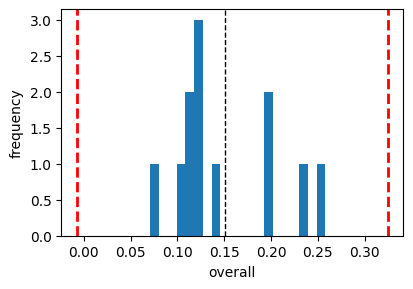

In [25]:
plt.subplots(figsize=(15, 10))
plt.subplot(3,3,1)
plt.hist(df_handfilled1['overall'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('overall')
plt.axvline(df_handfilled1['overall'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_handfilled1['overall'], [25])-1.5*(np.percentile(df_handfilled1['overall'], [75])-np.percentile(df_handfilled1['overall'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_handfilled1['overall'], [75])+1.5*(np.percentile(df_handfilled1['overall'], [75])-np.percentile(df_handfilled1['overall'], [25])), color='red', linestyle='dashed', linewidth=2)


<ipython-input-26-3a02ebba4407>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


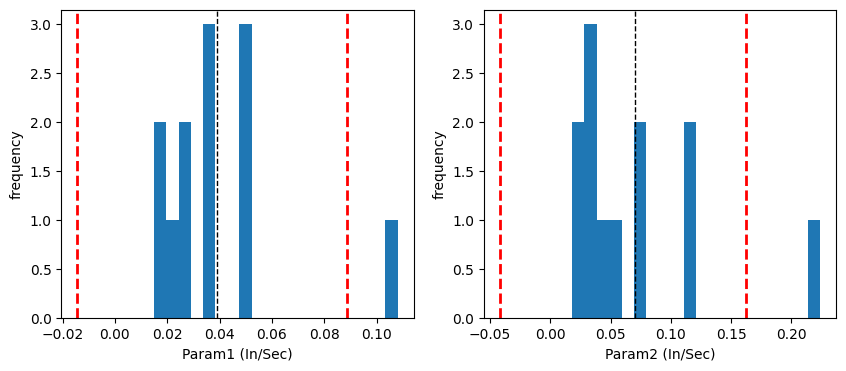

In [26]:
plt.subplots(figsize=(10, 4))
plt.subplot(1,2,1)
plt.hist(df_handfilled1['Param1'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('Param1 (In/Sec)')
plt.axvline(df_handfilled1['Param1'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_handfilled1['Param1'], [25])-1.5*(np.percentile(df_handfilled1['Param1'], [75])-np.percentile(df_handfilled1['Param1'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_handfilled1['Param1'], [75])+1.5*(np.percentile(df_handfilled1['Param1'], [75])-np.percentile(df_handfilled1['Param1'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(1,2,2)
plt.hist(df_handfilled1['Param2'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('Param2 (In/Sec)')
plt.axvline(df_handfilled1['Param2'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_handfilled1['Param2'], [25])-1.5*(np.percentile(df_handfilled1['Param2'], [75])-np.percentile(df_handfilled1['Param2'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_handfilled1['Param2'], [75])+1.5*(np.percentile(df_handfilled1['Param2'], [75])-np.percentile(df_handfilled1['Param2'], [25])), color='red', linestyle='dashed', linewidth=2)


<ipython-input-27-8b322cd5b94b>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,1)


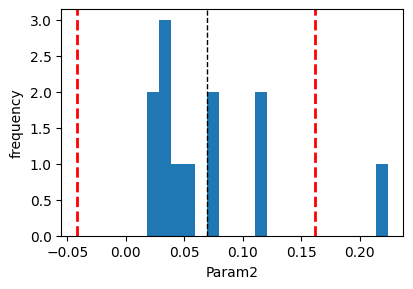

In [27]:
plt.subplots(figsize=(15, 10))
plt.subplot(3,3,1)
plt.hist(df_handfilled1['Param2'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('Param2')
plt.axvline(df_handfilled1['Param2'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_handfilled1['Param2'], [25])-1.5*(np.percentile(df_handfilled1['Param2'], [75])-np.percentile(df_handfilled1['Param2'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_handfilled1['Param2'], [75])+1.5*(np.percentile(df_handfilled1['Param2'], [75])-np.percentile(df_handfilled1['Param2'], [25])), color='red', linestyle='dashed', linewidth=2)


<ipython-input-28-660a690befa2>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,1)


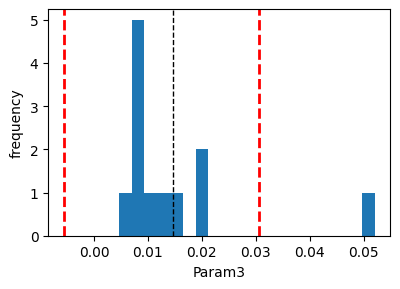

In [28]:
plt.subplots(figsize=(15, 10))
plt.subplot(3,3,1)
plt.hist(df_handfilled1['Param3'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('Param3')
plt.axvline(df_handfilled1['Param3'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_handfilled1['Param3'], [25])-1.5*(np.percentile(df_handfilled1['Param3'], [75])-np.percentile(df_handfilled1['Param3'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_handfilled1['Param3'], [75])+1.5*(np.percentile(df_handfilled1['Param3'], [75])-np.percentile(df_handfilled1['Param3'], [25])), color='red', linestyle='dashed', linewidth=2)


<ipython-input-29-9286a030e7d1>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,1)


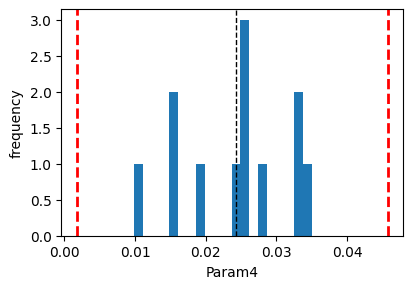

In [29]:
plt.subplots(figsize=(15, 10))
plt.subplot(3,3,1)
plt.hist(df_handfilled1['Param4'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('Param4')
plt.axvline(df_handfilled1['Param4'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_handfilled1['Param4'], [25])-1.5*(np.percentile(df_handfilled1['Param4'], [75])-np.percentile(df_handfilled1['Param4'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_handfilled1['Param4'], [75])+1.5*(np.percentile(df_handfilled1['Param4'], [75])-np.percentile(df_handfilled1['Param4'], [25])), color='red', linestyle='dashed', linewidth=2)


<ipython-input-30-059e623cbb28>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,1)


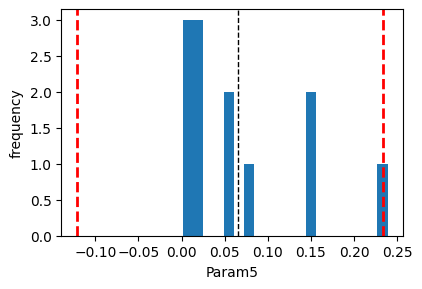

In [30]:
plt.subplots(figsize=(15, 10))
plt.subplot(3,3,1)
plt.hist(df_handfilled1['Param5'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('Param5')
plt.axvline(df_handfilled1['Param5'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_handfilled1['Param5'], [25])-1.5*(np.percentile(df_handfilled1['Param5'], [75])-np.percentile(df_handfilled1['Param5'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_handfilled1['Param5'], [75])+1.5*(np.percentile(df_handfilled1['Param5'], [75])-np.percentile(df_handfilled1['Param5'], [25])), color='red', linestyle='dashed', linewidth=2)
